In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("coc-2fz7c").project("coc-object-detection-ypfix")
version = project.version(4)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [6]:
!yolo train model=yolo11n.pt data={dataset.location}/data.yaml epochs=250 imgsz=640

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/CoC-Object-Detection-4/data.yaml, epochs=250, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

In [15]:
!yolo predict model=/content/runs/detect/train/weights/best.pt source='https://clashofclans-layouts.com/pics/th8_plans/war/original/th8_war_127.jpg'
!yolo predict model=/content/runs/detect/train/weights/best.pt source='https://clashofclans-layouts.com/pics/th8_plans/war/original/th8_war_127.jpg' show_labels=False show_conf=False

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,586,442 parameters, 0 gradients, 6.3 GFLOPs

Found https://clashofclans-layouts.com/pics/th8_plans/war/original/th8_war_127.jpg locally at th8_war_127.jpg
image 1/1 /content/th8_war_127.jpg: 320x640 3 air_defenses, 5 archer_towers, 1 army_camp, 2 barrackss, 5 builders_huts, 5 cannons, 1 dark_barracks, 2 dark_elixir_drills, 1 dark_elixir_storage, 7 elixir_collectors, 6 elixir_storages, 6 gold_mines, 3 gold_storages, 1 laboratory, 3 mortars, 1 spell_factory, 1 town_hall, 3 wizard_towers, 54.6ms
Speed: 2.0ms preprocess, 54.6ms inference, 681.8ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,586,442 parameters, 0 gradients, 6.3 GFLOPs

Found https://clash

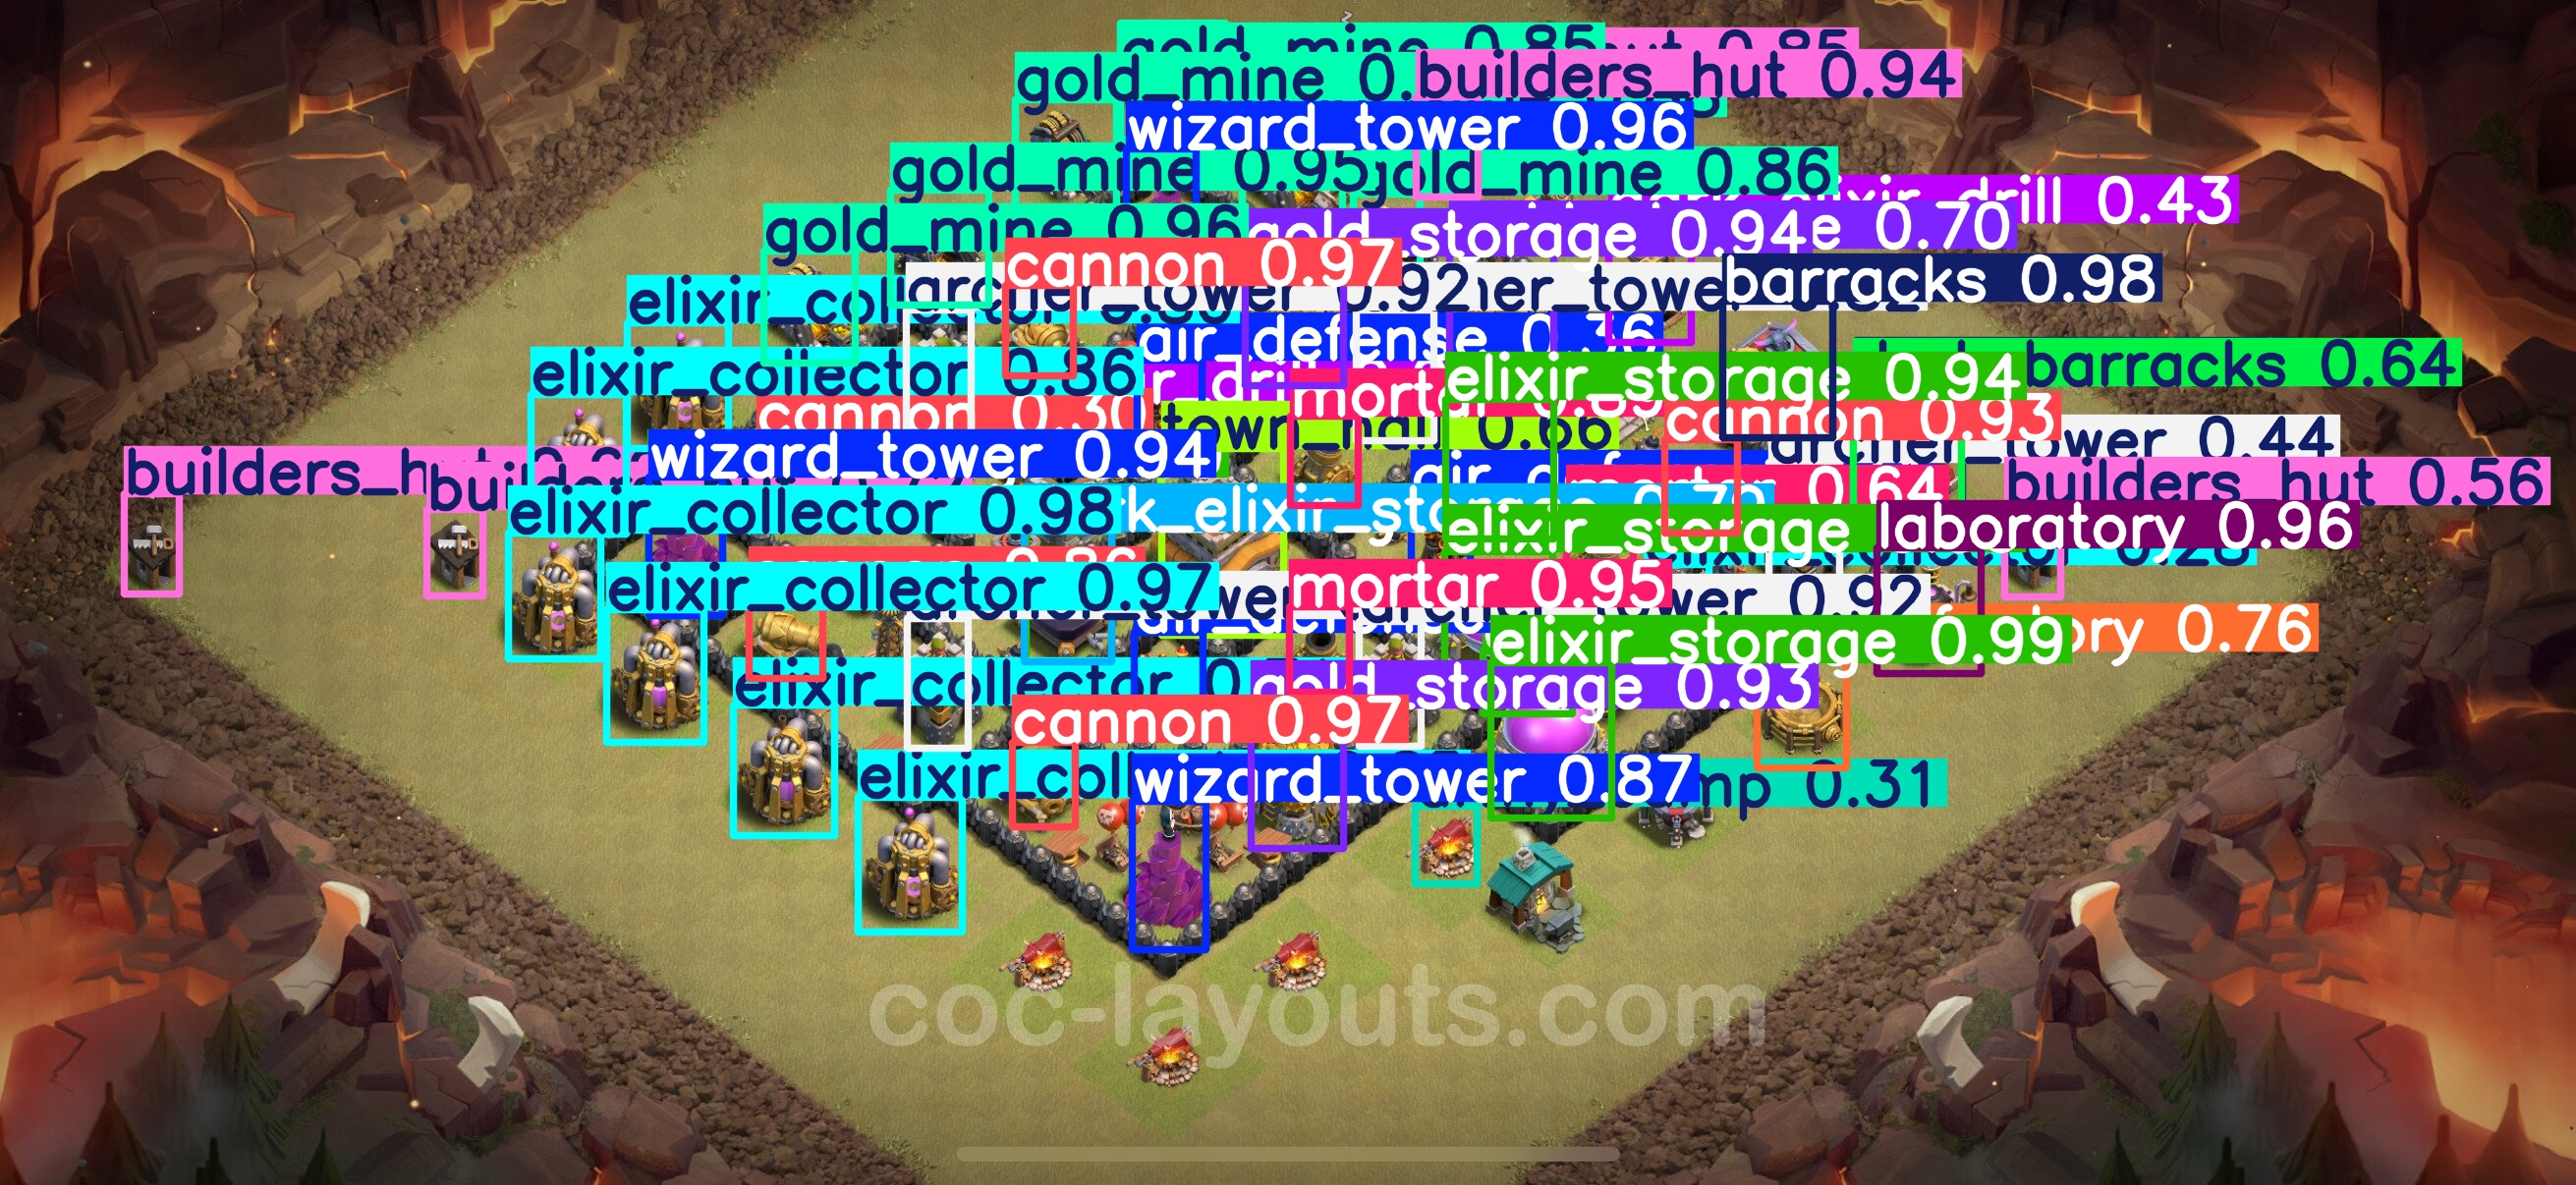

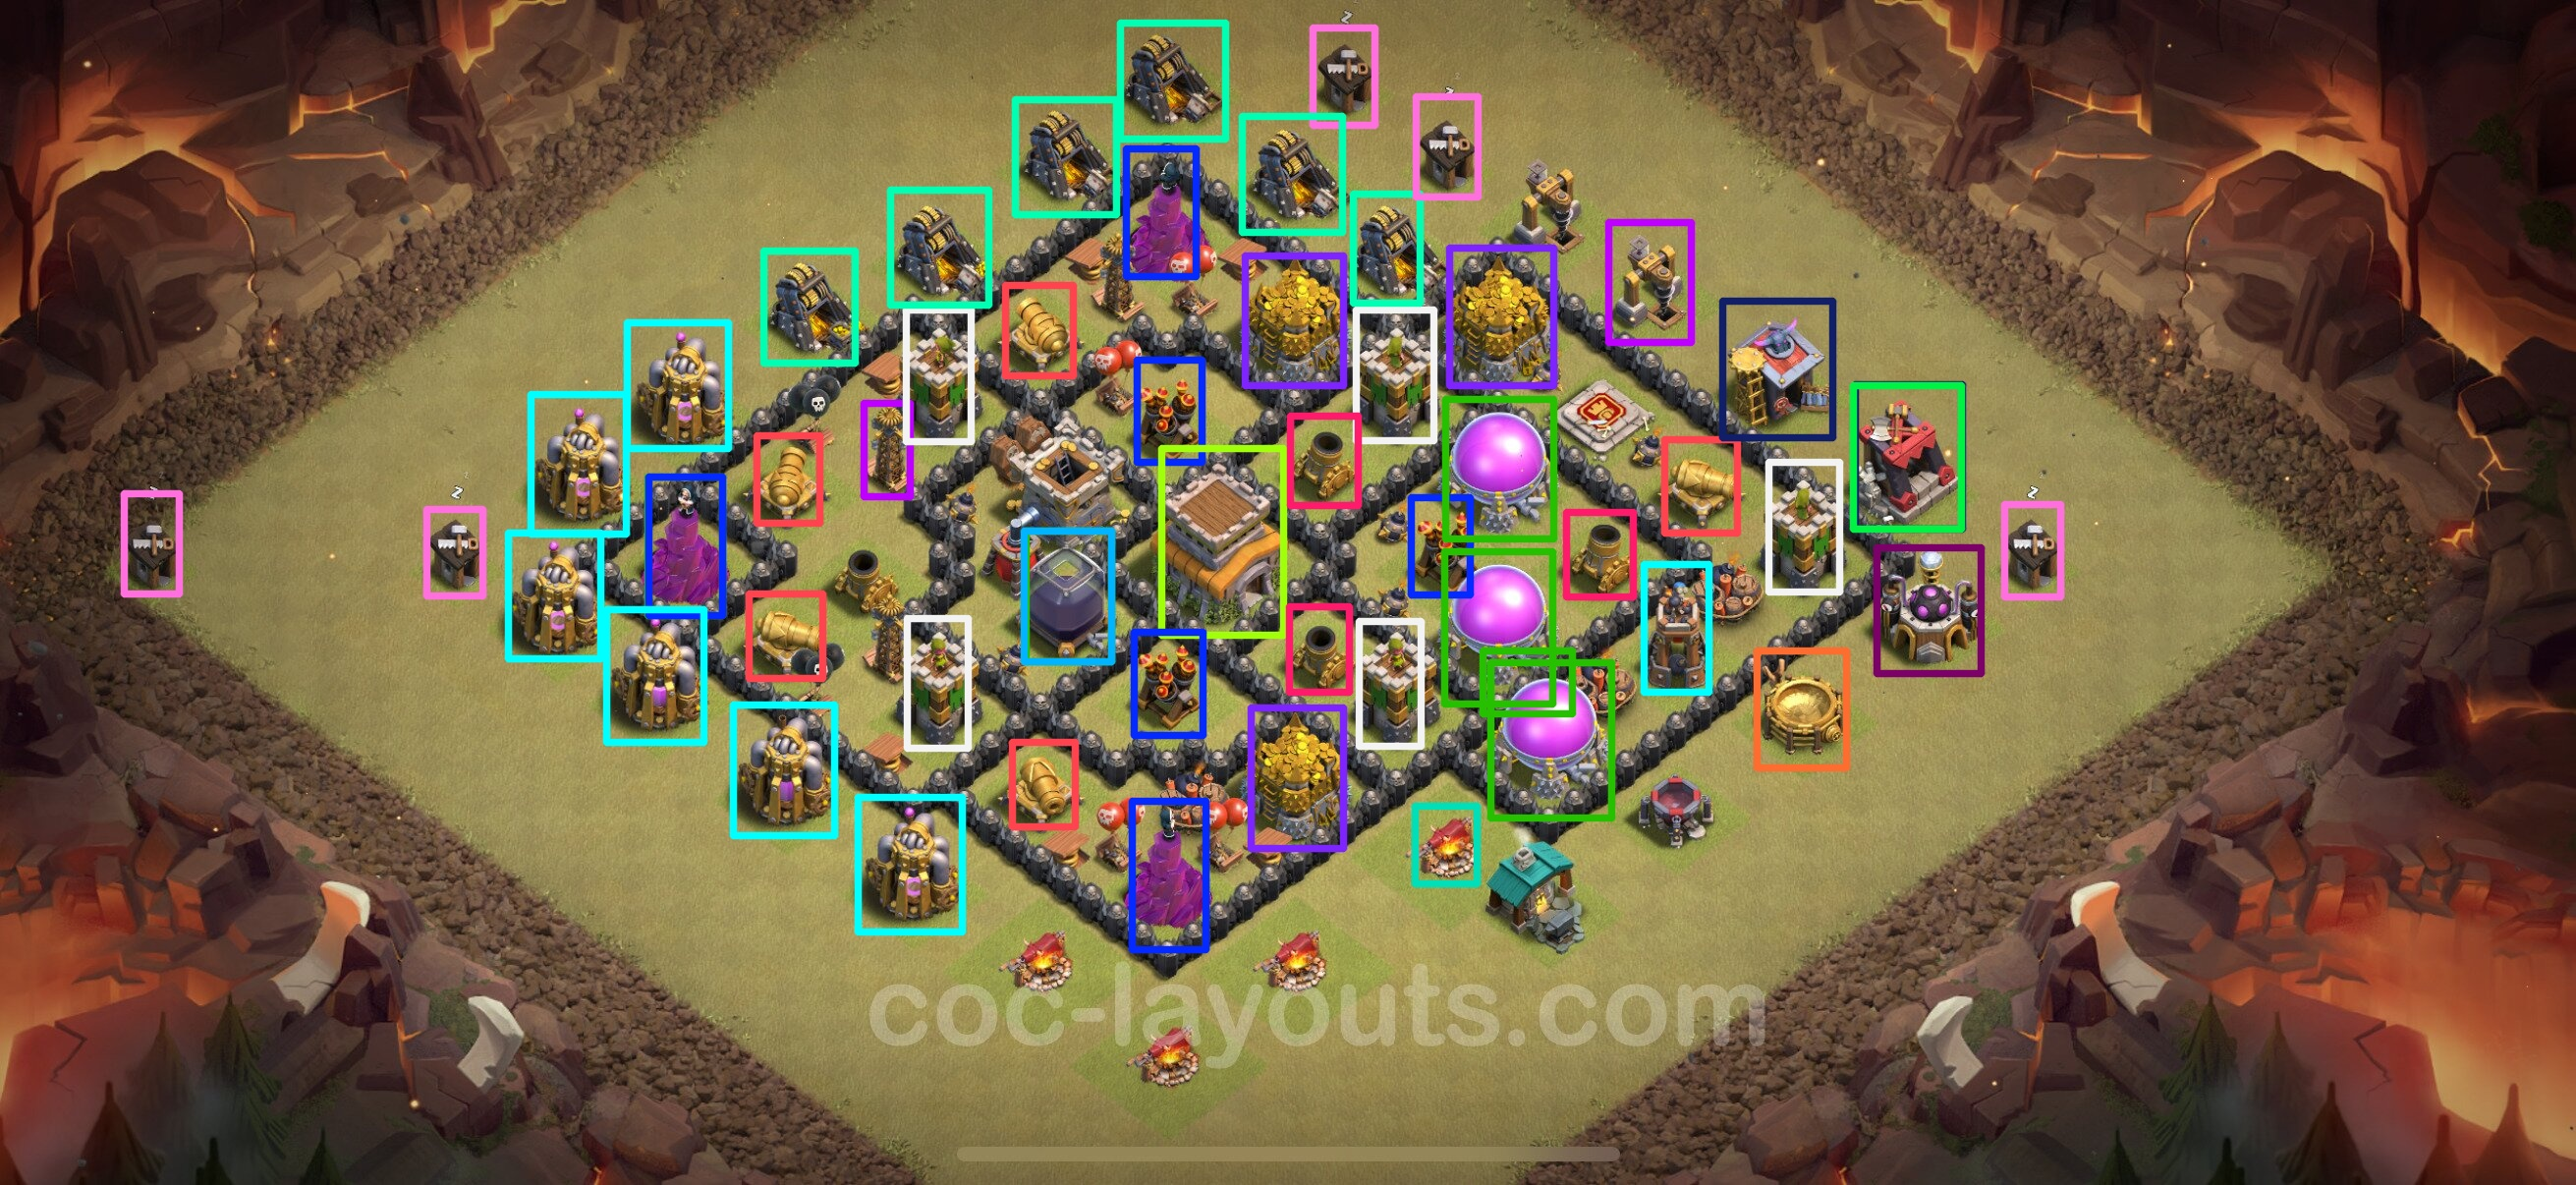

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict*/*.jpg'):
    display(Image(filename=image_path, width=600))
    print("\n")